# The Sparks Foundation - GRIP - Data Science and Business Analytics - OCT'2021

### TASK 1 : Prediction using supervised ML
    
Author : Rohan Rockie George
    
Dataset used: Student Scores
Dataset link - http://bit.ly/w-data
    
Problem Statement(s) :
Predict the percentage of a student based on the no. of study hours.
What will be predicted score if a student studies for 9.25 hrs/ day?
Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the csv dataset as a pandas dataframe

In [2]:
data = pd.read_csv("http://bit.ly/w-data")

In [3]:
data.head()  # check top 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape  # view the shape i.e. number of rows, columns

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualize the data

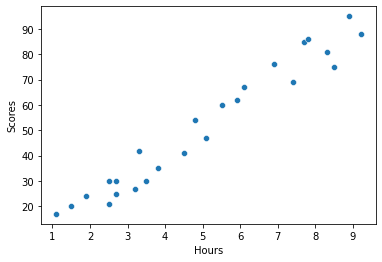

In [7]:
sns.scatterplot(x=data['Hours'], y=data['Scores']);   # plot the data

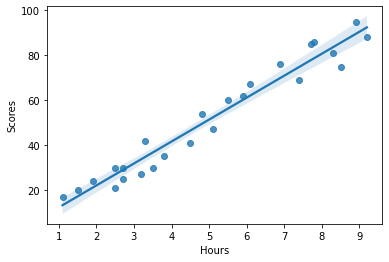

In [8]:
sns.regplot(x=data['Hours'], y=data['Scores']);  # regression plot gives a better and clear visualization for such data

## Separate feature(s) and target

In [9]:
X = data[['Hours']]
y = data['Scores']

## Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0,test_size=0.25)

## Model Building

In [11]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

In [12]:
regr.fit(train_X, train_y)   ## train the model

LinearRegression()

In [13]:
pred_y = regr.predict(test_X) ## prediction

In [14]:
pd.DataFrame({'Actual': test_y, 'Predicted': pred_y})  ## view actual and predicted on test set side-by-side

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


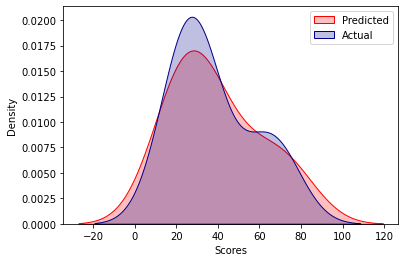

In [15]:
## Actual vs Predicted distribution plot 

sns.kdeplot(pred_y,label='Predicted',shade=True,color ="red");
sns.kdeplot(test_y, label='Actual',shade=True,color ="darkblue");
plt.legend()

In [16]:
print('Train accuracy= ', regr.score(train_X, train_y),'\nTest accuracy = ', regr.score(test_X, test_y) )

Train accuracy=  0.9484509249326872 
Test accuracy =  0.9367661043365056


In [17]:
# Predict percent for custom input value for hours
# Q. What will be predicted score if a student studies for 9.25 hrs/ day? 

h = [[9.25]]
s = regr.predict(h)
print('A student who studies ', h[0][0] , ' hours is estimated to score ', s[0])

A student who studies  9.25  hours is estimated to score  93.89272889341652
